# Multiple Linear Regression Model on the Bike-Sharing Dataset

### Problem Statement:

A US bike sharing provider $BoomBikes$ has facing some drops in their revenue due to ongoing Corona pandemic. And company is finding it very difficult to sustain in the current maket scenerio. So, it has decided to come up with a mindful business plan to be able to increase their revenue as soon as possible and the economy restores to a healthy state.
Now company wants to understand the factors on which the demand for these shared bikes depends.

#### Our task is to find:
- which variables are siginificant in predicting the demand for shared bikes.
- how well those variables describe the bike demands.

In [1]:
# Import useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Step1: Reading and Understanding Dataset

In [2]:
# Read the data
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# shape of the data
bike.shape

(730, 16)

In [4]:
# checking the dypes of the data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# checking summary of data
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step2: Data Cleaning

#### As we can see in $info$ function there are many categorical variables which are in "int" data type we have to change their type
- But before that we have to change season, mnth, weekday and weathersit columns values in categorical values.
- For our better understanding during visualization process as well as for the model better understanding.

In [6]:
# changing categorical columns value
bike['season'] = bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike['mnth'] = bike['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',
                                7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike['weekday'] = bike['weekday'].map({1:'mon',2:'tue',3:'wed',4:'thr',5:'fri',6:'sat',0:'sun'})
bike['weathersit'] = bike['weathersit'].map({1:'clear',2:'mist',3:'light_snow'})

- wethersit have only three values 1, 2 and 3
- so we are converting only these values in categoric values

In [7]:
# check the results
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,thr,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# change their datatype as well as other categoricals columns 
bike['season'] = bike['season'].astype(str)
bike['mnth'] = bike['mnth'].astype(str)
bike['weekday'] = bike['weekday'].astype(str)
bike['weathersit'] = bike['weathersit'].astype(str)
bike['yr'] = bike['yr'].astype(str)
bike['holiday'] = bike['holiday'].astype(str)
bike['workingday'] = bike['workingday'].astype(str)

In [9]:
# check the result
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


Two more things we have to be done here
- As instant column is redundant here which has no use so we have to drop this column
- And date column datatype is also not in correct format so we have to change their datatype

In [10]:
# drop the instant column
bike.drop(columns='instant', axis=1, inplace=True)
bike.head()      # check the result

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,jan,0,thr,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# change the format and datatype of date column
import datetime
bike['dteday'] = bike["dteday"].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y').date())
bike['dteday'] = bike['dteday'].astype('datetime64[ns]')
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,spring,0,jan,0,thr,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### All cleaning done

# Step3: Data Visualization
- Let see the distribution of the various variables
- As we can see that casual and registered have a value which represent demand of bikes which is same as cnt column.
- So we are not visualizing that column as we already have a information of that in cnt column

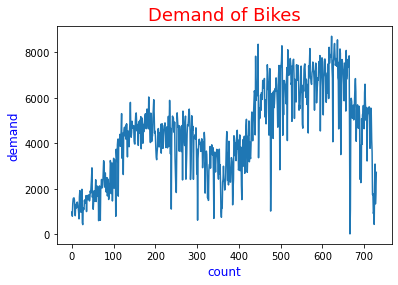

In [12]:
# demnds of bikes
plt.plot(bike.cnt)
plt.title('Demand of Bikes', fontsize=18, color='r')
plt.xlabel('count', fontsize=12, color='b')
plt.ylabel('demand', fontsize=12, color='b')
plt.show()

- As we can see the demand of bikes incresing at the starting which is normal case for any company.
- But after 180 it declines and after sometime it again take a sharp increment after 360 around.
- And after 640 it suddenly decline.

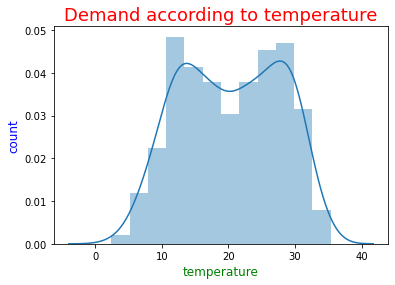

In [13]:
# temp column
sns.distplot(bike.temp)
plt.title('Demand according to temperature', fontsize=18, color='r')
plt.xlabel('temperature', fontsize=12, color='g')
plt.ylabel('count', fontsize=12, color='b')
plt.show()

- As we see demands of bikes are more when temperature is between 13 to 32 degree celsius
- Which infer that people less likely to go with bike when it is more cold as well as more hot weather

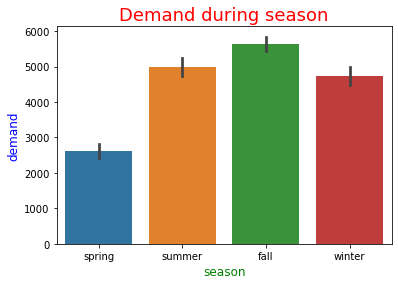

In [14]:
# season vs demand of bikes
sns.barplot(bike.season,bike.cnt)
plt.title('Demand during season', fontsize=18, color='r')
plt.xlabel('season', fontsize=12, color='g')
plt.ylabel('demand', fontsize=12, color='b')
plt.show()

- Demand of bikes are more in fall season as compared to other seasons

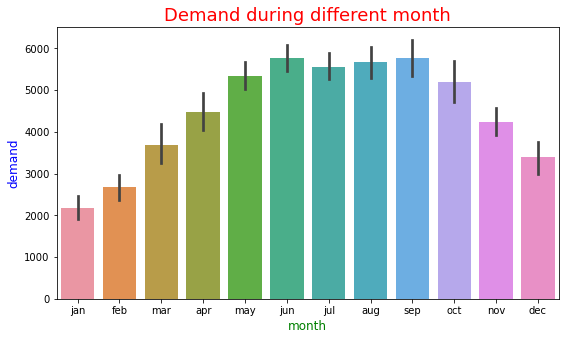

In [15]:
# month vs demand of bikes
plt.figure(figsize=(9,5))
sns.barplot(bike.mnth, bike.cnt)
plt.title('Demand during different month', fontsize=18, color='r')
plt.xlabel('month', fontsize=12, color='g')
plt.ylabel('demand', fontsize=12, color='b')
plt.show()

- As we can see demands are more in between june to september month.
- Which is according to demand in fall season which we have seen in chart above. 
- As fall season starts from september month that month prefered mostly by people who like to ride bikes.
- And we have also seen that summer is second highest month in demand of bike followed by fall month

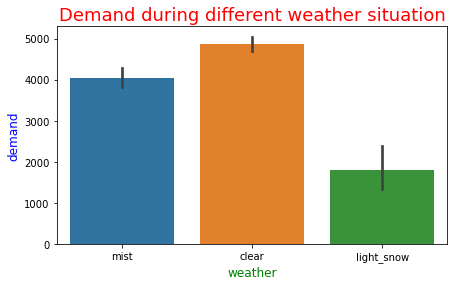

In [16]:
# wheather vs demand of bike
plt.figure(figsize=(7,4))
sns.barplot(bike.weathersit, bike.cnt)
plt.title('Demand during different weather situation', fontsize=18, color='r')
plt.xlabel('weather', fontsize=12, color='g')
plt.ylabel('demand', fontsize=12, color='b')
plt.show()

#### There are many things which have to be notice
- People like to ride a bike when there is clear weather or partly cloud
- But there are low demand of bikes when light snow and light rain 

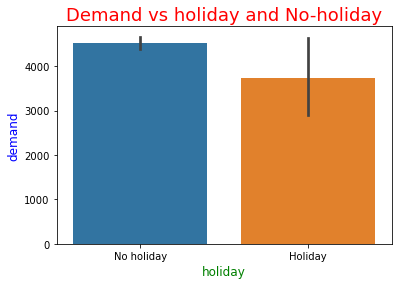

In [17]:
# holiday vs demand of bikes
sns.barplot(bike.holiday, bike.cnt)
plt.title('Demand vs holiday and No-holiday', fontsize=18, color='r')
plt.xlabel('holiday', fontsize=12, color='g')
plt.ylabel('demand', fontsize=12, color='b')
plt.xticks([0,1],['No holiday','Holiday'])
plt.show()

- When it is working day then there are high demand of bikes
- May be demand of bikes are more in tourist or by outsiders
- Who came there for riding a bike

## Let visualize all the categorical columns and numeric columns

### Starting with Categorical Coumns

In [18]:
categorical = list(set(bike.columns) - set(bike.describe().columns))
categorical

['season',
 'mnth',
 'dteday',
 'weathersit',
 'holiday',
 'yr',
 'weekday',
 'workingday']

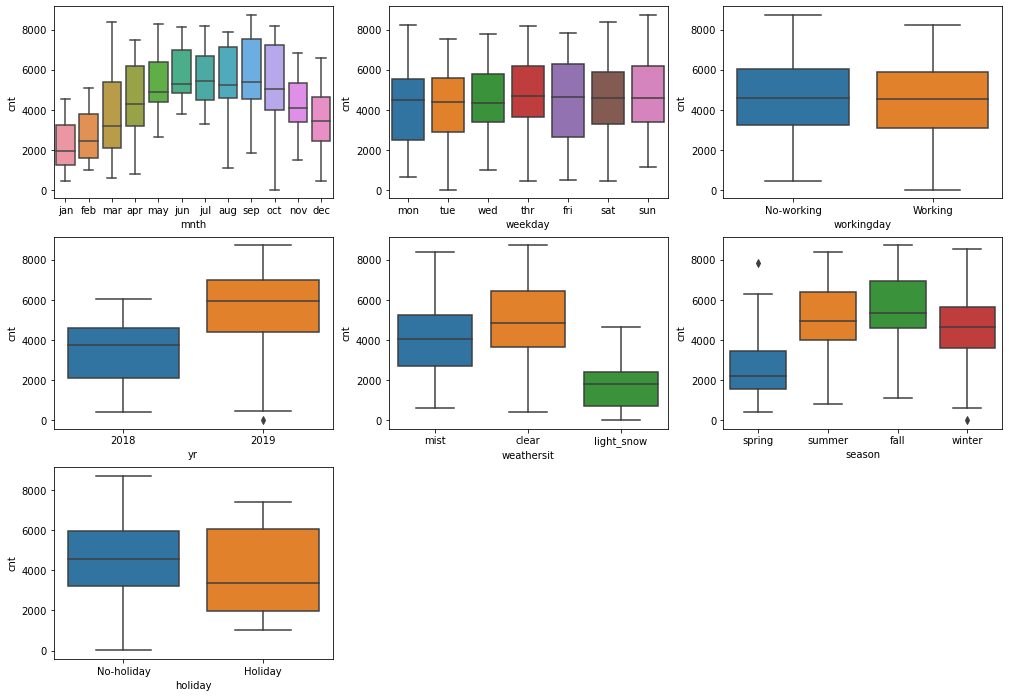

In [19]:
# categorical variables
plt.figure(figsize=(17,12))
plt.subplot(3,3,1)
sns.boxplot(bike.mnth,bike.cnt)
plt.subplot(3,3,2)
sns.boxplot(bike.weekday,bike.cnt)
plt.subplot(3,3,3)
sns.boxplot(bike.workingday,bike.cnt)
plt.xticks([0,1],['No-working','Working'])
plt.subplot(3,3,4)
sns.boxplot(bike.yr,bike.cnt)
plt.xticks([0,1],[2018,2019])
plt.subplot(3,3,5)
sns.boxplot(bike.weathersit,bike.cnt)
plt.subplot(3,3,6)
sns.boxplot(bike.season,bike.cnt)
plt.subplot(3,3,7)
sns.boxplot(bike.holiday,bike.cnt)
plt.xticks([0,1],['No-holiday','Holiday'])
plt.show()

#### Some points there have to be noticed
- At sunday usually demand of bikes are high as on this day almost everyones office is closed even outsiders also
- Demand of bikes are more in 2019 as compared to 2018
- When there is no holiday then demand of bikes are high which indicates that demand may be increased by outsiders

### NUmerical Variables

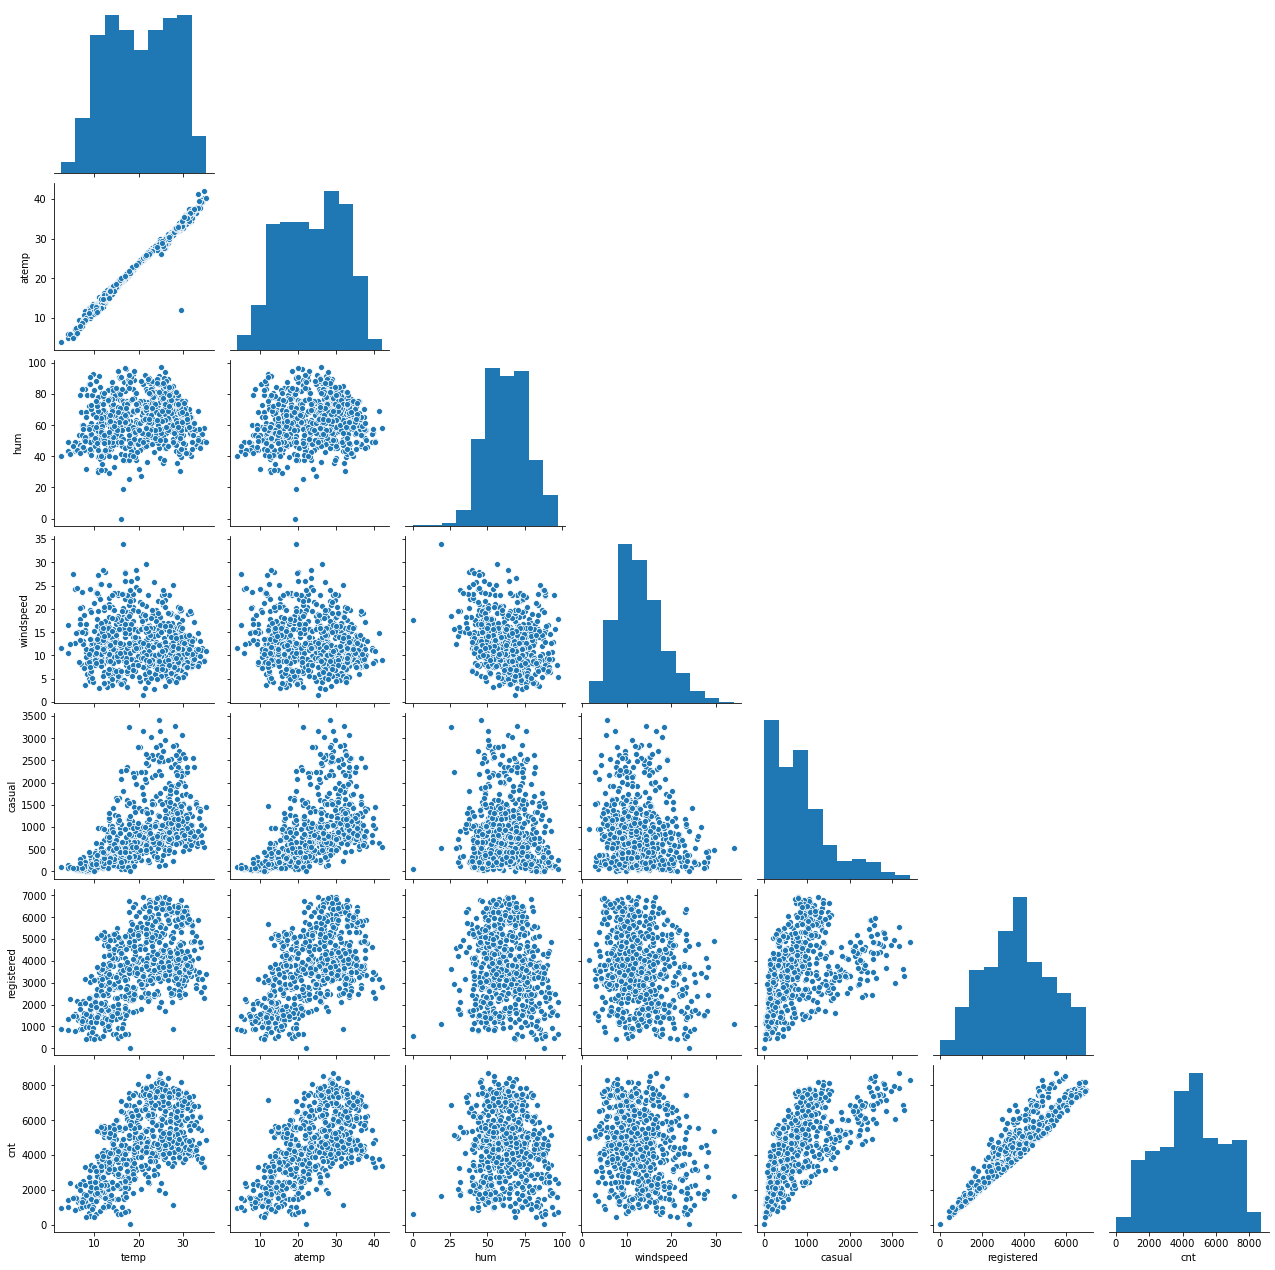

In [20]:
# Numerical variables
numerical = bike.describe().columns
sns.pairplot(bike[numerical], corner=True)
plt.show()

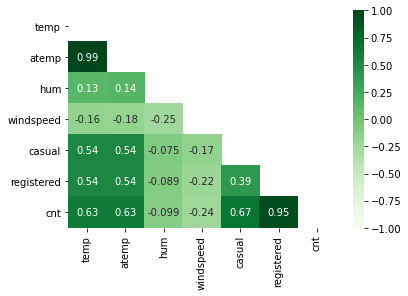

In [21]:
# Numeric columns using heatmap
mask = np.triu(np.ones_like(bike[numerical].corr(),dtype=np.bool))
sns.heatmap(bike[numerical].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Greens')
plt.show()

- We can see temperature and feeling temperature are highly correlated.
- They both are actually same so we can drop one of them.
- And casual and registered are also correlated with total demand of bikes (cnt)
- They also give the same information which cnt column gives.
- So we have to drop both of them

#### Date column also has a no use further for model building process so we drop that also 

In [22]:
# drop atemp, casual, dteday and registered column
bike.drop(columns=['atemp','casual','dteday','registered'], inplace=True)
bike.head()    # for check the result

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thr,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


# Step4: Data Preparing

## Following Steps we follow
1. Creating a dummy column
2. Split data into train and test set
3. Scaling the numric columns
4. Creat a X and y 

### Dummy Variable
- We have season, mnth, weekday and weathersit columns which has more than two values
- So we create a dummy column of these independent variables
- And then delete these independent variables when their dummies created

In [23]:
# create a dummy column
dummy = pd.get_dummies(bike[['season','mnth','weekday','weathersit']], drop_first=True)
dummy.head()   # for check the result

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thr,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Drop the season, mnth, weekday and weathersit column 
bike.drop(columns=['season','mnth','weekday','weathersit'], inplace=True)

- Add the dummy data into bike data

In [25]:
# concat dummy into bike dataset
bike = pd.concat((bike,dummy),axis=1)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thr,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thr', 'weekday_tue',
       'weekday_wed', 'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')

### Spliting data into Train and Test Set
- But before that we have to import useful libraries for split

In [27]:
# import useful libraries
from sklearn.model_selection import train_test_split

In [28]:
# split the data into train and test
bike_train, bike_test = train_test_split(bike, train_size=0.7, random_state=100)
bike_train.shape

(510, 29)

### Rescaling the numeric variables
- As we know if we are not scaling the numeric variables.
- Then there is difference in the coefficient values of these numeric columns as compared to other columns.
- And for the better accuracy of model also we need to rescale the numeric variables
- We are using MinMaxScaling as this scaling technique not affecting outliers.

In [29]:
# import useful libraries for minmaxscaler
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Instantiate object
scaler = MinMaxScaler()
# create a list of numeric columns
numeric = ['temp','hum','windspeed','cnt']
# Apply scaler to all numeric columns
bike_train[numeric] = scaler.fit_transform(bike_train[numeric])
bike_train.head()      # For check the result

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thr,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


- Before starting model building process we have to change datatype of object into int.
- For linear regression model working on that

In [31]:
bike_train[['yr','holiday','workingday']] = bike_train[['yr','holiday','workingday']].astype('int64')
bike_test[['yr','holiday','workingday']] = bike_test[['yr','holiday','workingday']].astype('int64')

### Dividing train data into X and y for model building

In [32]:
# define columns for X
def column(x):
    col = []
    for i in x.columns:
        if i!= 'cnt':
            col.append(i)
    return col

In [33]:
# creating X and y
y_train = bike_train['cnt']
X_train = bike_train[column(bike_train)]

# Step5: Model Building
#### As we have a 29 indepndent variables in our train data set, that's why we are using Automated Approach here

### Backward Selection Technique
#### In this technique we are following certain steps:
1. Taking all independent variables.
2. Then droping individual independent variable which have low significance in that model based on p-value.
3. And droping predictor variables based on their VIF value (variance inflation factor)

In [34]:
# import useful libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Running 1st model

In [35]:
# Add constant
X_train_sm = sm.add_constant(X_train)
# create a model and fit line
lr1_model = sm.OLS(y_train,X_train_sm).fit()
# check the summary
print(lr1_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.34e-178
Time:                        11:55:36   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.39

In [36]:
# # checking VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
2,workingday,63.89
3,temp,43.77
4,hum,41.18
6,season_spring,13.50
8,season_winter,12.40
22,weekday_sun,12.34
21,weekday_sat,11.83
7,season_summer,9.85
17,mnth_nov,7.16
18,mnth_oct,6.82


#### Here we have to notice that :
- As workingday has a high p-value as well as high VIF value 
- So we are going to drop that from our train dataset

In [37]:
# drop workingday column
X_train.drop(columns='workingday',inplace=True)

#### Running 2nd model

In [38]:
# Add constant
X_train_sm = sm.add_constant(X_train)
# create a model and fit line
lr2_model = sm.OLS(y_train,X_train_sm).fit()
# check the summary
print(lr2_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.1
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.88e-179
Time:                        11:55:36   Log-Likelihood:                 522.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     482   BIC:                            -870.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

In [39]:
# # checking VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
3,hum,37.70
2,temp,36.94
5,season_spring,11.85
7,season_winter,11.71
6,season_summer,7.02
17,mnth_oct,6.32
16,mnth_nov,6.07
8,mnth_aug,5.89
12,mnth_jul,5.30
11,mnth_jan,5.22


#### Here we have to notice that :
- Spring season has a high p-value and VIF and we also notice that in our EDA process spring season has very low demand.
- So we can drop this column from our dataset

In [40]:
# drop spring column
X_train.drop(columns='season_spring', axis=1, inplace=True)

#### Running our 3rd model

In [41]:
# Add constant
X_train_sm = sm.add_constant(X_train)
# create a model and fit line
lr3_model = sm.OLS(y_train,X_train_sm).fit()
# check the summary
print(lr3_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     104.8
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          4.33e-180
Time:                        11:55:36   Log-Likelihood:                 521.68
No. Observations:                 510   AIC:                            -989.4
Df Residuals:                     483   BIC:                            -875.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [42]:
# checking VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
2,temp,36.69
3,hum,36.05
6,season_winter,8.03
16,mnth_oct,6.16
15,mnth_nov,5.87
7,mnth_aug,5.21
5,season_summer,4.83
4,windspeed,4.81
11,mnth_jul,4.75
8,mnth_dec,4.38


#### Here we have to notice that :
- October month have a high p-value and high VIF value.
- But we know that $october$ comes in Fall season and there are high demand in Fall season.
- So we have to consider october month for further anaysis

In [43]:
# drop october variable
X_train.drop(columns='mnth_oct', axis=1, inplace=True)

#### Running our 4th model

In [44]:
# Add constant
X_train_sm = sm.add_constant(X_train)
# create a model and fit line
lr4_model = sm.OLS(y_train,X_train_sm).fit()
# check the summary
print(lr4_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          4.16e-181
Time:                        11:55:36   Log-Likelihood:                 521.67
No. Observations:                 510   AIC:                            -991.3
Df Residuals:                     484   BIC:                            -881.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [45]:
# checking VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
2,temp,35.77
3,hum,32.56
4,windspeed,4.67
6,season_winter,4.54
7,mnth_aug,3.92
5,season_summer,3.77
11,mnth_jul,3.71
12,mnth_jun,2.55
10,mnth_jan,2.53
16,mnth_sep,2.46


#### Point to be noted here that :
- Saturday has a very high p-value so this may be not a significant independent variable for our model
- We have to drop this variable.

In [46]:
# drop saturday variable
X_train.drop(columns='weekday_sat', axis=1, inplace=True)

#### Running our 5th model

In [47]:
# Add constant
X_train_sm = sm.add_constant(X_train)
# create a model and fit line
lr5_model = sm.OLS(y_train,X_train_sm).fit()
# check the summary
print(lr5_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     114.0
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          3.92e-182
Time:                        11:55:37   Log-Likelihood:                 521.65
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     485   BIC:                            -887.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [48]:
# checking VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
2,temp,35.18
3,hum,32.43
4,windspeed,4.64
6,season_winter,4.50
7,mnth_aug,3.92
5,season_summer,3.72
11,mnth_jul,3.70
12,mnth_jun,2.55
10,mnth_jan,2.46
16,mnth_sep,2.46


#### Point to be noted here that :
- Thursday variable has a very high p-value.
- So we have to drop this variable from our dataset.

In [49]:
# drop thursday variable
X_train.drop(columns='weekday_thr', axis=1, inplace=True)

#### Running our 6th model

In [50]:
# Add constant
X_train_sm = sm.add_constant(X_train)
# create a model and fit line
lr6_model = sm.OLS(y_train,X_train_sm).fit()
# check the summary
print(lr6_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     119.2
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          3.65e-183
Time:                        11:55:37   Log-Likelihood:                 521.62
No. Observations:                 510   AIC:                            -995.2
Df Residuals:                     486   BIC:                            -893.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [51]:
# checking VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
2,temp,34.95
3,hum,32.34
4,windspeed,4.63
6,season_winter,4.47
7,mnth_aug,3.92
11,mnth_jul,3.70
5,season_summer,3.68
12,mnth_jun,2.54
16,mnth_sep,2.45
10,mnth_jan,2.44


#### Point to be noted here that :
- July month has a high p-value so we are going to drop it

In [52]:
# drop july variable
X_train.drop(columns='mnth_jul', axis=1, inplace=True)

#### Running our 7th model

In [53]:
# Add constant
X_train_sm = sm.add_constant(X_train)
# create a model and fit line
lr7_model = sm.OLS(y_train,X_train_sm).fit()
# check the summary
print(lr7_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     124.8
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          3.55e-184
Time:                        11:55:37   Log-Likelihood:                 521.52
No. Observations:                 510   AIC:                            -997.0
Df Residuals:                     487   BIC:                            -899.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [54]:
# checking VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
3,hum,31.94
2,temp,19.57
4,windspeed,4.56
6,season_winter,3.48
5,season_summer,3.06
10,mnth_jan,2.40
21,weathersit_mist,2.32
0,yr,2.11
14,mnth_nov,1.91
13,mnth_may,1.90


#### Point to be noted here that :
- In our EDA analysis we have notice that demand of bikes are high in $uly$ also.
- So may be this variable is significant for our model.
- So we have to consider this variable for further analysis.
- March column has a high p-value so we are going to drop that variable

In [55]:
# drop july variable
X_train.drop(columns='mnth_mar', axis=1, inplace=True)

#### Running our 8th model

In [56]:
# Add constant
X_train_sm = sm.add_constant(X_train)
# create a model and fit line
lr8_model = sm.OLS(y_train,X_train_sm).fit()
# check the summary
print(lr8_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     130.9
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          3.48e-185
Time:                        11:55:37   Log-Likelihood:                 521.38
No. Observations:                 510   AIC:                            -998.8
Df Residuals:                     488   BIC:                            -905.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [57]:
# checking VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
3,hum,26.45
2,temp,17.72
4,windspeed,4.20
6,season_winter,3.11
5,season_summer,3.03
20,weathersit_mist,2.27
0,yr,2.09
10,mnth_jan,1.99
13,mnth_nov,1.88
12,mnth_may,1.80


#### Point to be noted here that :
- Now sunday has a next high p-value.
- But in our EDA analysis demand of bikes are very high on $sunday$.
- So we are not droping this variable and we are going to see next high p-value variable.
- Wednesday has a high p-value and we are going to drop that variable.

In [58]:
# drop wednesday variable
X_train.drop(columns='weekday_wed', axis=1, inplace=True)

#### Running our 9th model

In [59]:
# Add constant
X_train_sm = sm.add_constant(X_train)
# create a model and fit line
lr9_model = sm.OLS(y_train,X_train_sm).fit()
# check the summary
print(lr9_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.4
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          4.50e-186
Time:                        11:55:37   Log-Likelihood:                 520.93
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     489   BIC:                            -910.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [60]:
# checking VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
3,hum,26.21
2,temp,17.72
4,windspeed,4.20
6,season_winter,3.08
5,season_summer,3.02
19,weathersit_mist,2.27
0,yr,2.09
10,mnth_jan,1.98
13,mnth_nov,1.88
12,mnth_may,1.80


#### Point to be noted here that :
- June month has a high p-value but in our EDA analysis we see that demand of bike are high in june month also.
- So we are not droping this variable as of now but may be in later we drop it.
- May month also have a high p-value as we are going to drop it

In [61]:
# drop may variable
X_train.drop(columns='mnth_may', axis=1, inplace=True)

#### Running our 10th model

In [62]:
# Add constant
X_train_sm = sm.add_constant(X_train)
# create a model and fit line
lr10_model = sm.OLS(y_train,X_train_sm).fit()
# check the summary
print(lr10_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.3
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          9.89e-187
Time:                        11:55:38   Log-Likelihood:                 519.90
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     490   BIC:                            -915.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [63]:
# checking VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
3,hum,26.20
2,temp,17.11
4,windspeed,4.07
6,season_winter,3.08
5,season_summer,2.35
18,weathersit_mist,2.26
0,yr,2.07
10,mnth_jan,1.98
12,mnth_nov,1.87
7,mnth_aug,1.72


#### Point to be noted here that :
- Now except sunday and june variable all variables seems to be significant.
- But humidity is having a high VIF value lets drop it.

In [64]:
# drop humidity variable
X_train.drop(columns='hum', axis=1, inplace=True)

#### Running our 11th model

In [65]:
# Add constant
X_train_sm = sm.add_constant(X_train)
# create a model and fit line
lr11_model = sm.OLS(y_train,X_train_sm).fit()
# check the summary
print(lr11_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     146.8
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          2.35e-184
Time:                        11:55:38   Log-Likelihood:                 511.54
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     491   BIC:                            -904.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [66]:
# checking VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
2,temp,6.16
3,windspeed,4.06
5,season_winter,2.67
0,yr,2.07
4,season_summer,2.05
11,mnth_nov,1.82
6,mnth_aug,1.72
17,weathersit_mist,1.59
7,mnth_dec,1.42
12,mnth_sep,1.39


#### Point to be noted here that :
- Temperature variable has also having a high VIF value.
- So lets drop that variable also

In [67]:
# drop temperature variable
X_train.drop(columns='temp', axis=1, inplace=True)

#### Running our 12th model

In [68]:
# Add constant
X_train_sm = sm.add_constant(X_train)
# create a model and fit line
lr12_model = sm.OLS(y_train,X_train_sm).fit()
# check the summary
print(lr12_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     105.3
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.46e-151
Time:                        11:55:38   Log-Likelihood:                 430.08
No. Observations:                 510   AIC:                            -824.2
Df Residuals:                     492   BIC:                            -747.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.50

In [69]:
# checking VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
2,windspeed,3.32
4,season_winter,2.55
3,season_summer,1.90
0,yr,1.88
10,mnth_nov,1.81
16,weathersit_mist,1.58
6,mnth_dec,1.42
8,mnth_jan,1.29
7,mnth_feb,1.27
12,weekday_mon,1.26


#### Point to be noted here that :
- When we drop the temperature variable the p-value of tuesday came out be high.
- And when we are doing EDA in that the demand of bike are low on tuesday.
- So it means we have to drop that variable also from tha dataset

In [70]:
# drop tuesday variable
X_train.drop(columns='weekday_tue', axis=1, inplace=True)

#### Running our 13th model

In [71]:
# Add constant
X_train_sm = sm.add_constant(X_train)
# create a model and fit line
lr13_model = sm.OLS(y_train,X_train_sm).fit()
# check the summary
print(lr13_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     111.0
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          7.75e-152
Time:                        11:55:38   Log-Likelihood:                 428.26
No. Observations:                 510   AIC:                            -822.5
Df Residuals:                     493   BIC:                            -750.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.50

In [72]:
# checking VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
2,windspeed,3.21
4,season_winter,2.52
3,season_summer,1.90
0,yr,1.87
10,mnth_nov,1.81
15,weathersit_mist,1.57
6,mnth_dec,1.42
8,mnth_jan,1.29
7,mnth_feb,1.26
5,mnth_aug,1.25


#### Check the number of independent variables that are significant according to this model

In [73]:
len(X_train.columns)

16

### According to this technique we have 16 independent variables which are significant for model
- But for the safe move lets use the other techniques also and see how many independent variables are significant according to that technique and then we are going to select the best possible independent variables that are significant for predicting the demand of bikes with manual techniques

### Recursive Feature Selection (RFE) 

In [74]:
# import useful libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [75]:
# create X and y 
y_train_rfe = bike_train['cnt']
X_train_rfe = bike_train[column(bike_train)]

In [76]:
# Instantiate object
lm = LinearRegression()
# fit the model
lm.fit(X_train_rfe,y_train_rfe)
# running rfe
rfe = RFE(lm,16)
# fit rfe
rfe = rfe.fit(X_train_rfe,y_train_rfe)

In [77]:
# check the list of columns that selected through rfe
list(zip(X_train_rfe.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 10),
 ('mnth_mar', False, 13),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 11),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 6),
 ('weekday_sat', False, 3),
 ('weekday_sun', False, 4),
 ('weekday_thr', False, 12),
 ('weekday_tue', False, 5),
 ('weekday_wed', False, 9),
 ('weathersit_light_snow', True, 1),
 ('weathersit_mist', True, 1)]

In [78]:
# check the columns which rfe support
col = X_train_rfe.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_sep', 'weathersit_light_snow',
       'weathersit_mist'],
      dtype='object')

#### Some conclusion we can drawn by comparing variables of RFE and Backward Selection techniques that :
- Some variables are supported by RFE technique which is not supported by Backward selection.
- These are temp, hum, spring and july.
- In which spring variable is not consider to be significant as we see in EDA analysis.
- So we can add this variables in our further analysis as we know that demand of bike are almost good in july.

#### Let see any insignificant variable is there in variables given by RFE techniques

#### Running our 14th model

In [79]:
X_train_rfes = bike_train[col]

In [80]:
# Add constant
X_train_sm = sm.add_constant(X_train_rfes)
# create a model and fit line
lr14_model = sm.OLS(y_train_rfe,X_train_sm).fit()
# check the summary
print(lr14_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          2.94e-188
Time:                        11:55:38   Log-Likelihood:                 515.57
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     493   BIC:                            -925.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

#### Point to be noted here that :
- According to RFE variables february variable has a insignificant.
- And the R-square comes out to be good with variables of RFE
- Let see if we drop february variable is there any changes in R-square value 

In [81]:
# drop february variable
X_train_rfes.drop(columns='mnth_feb', axis=1, inplace=True)

#### Running our 15th model

In [82]:
# Add constant
X_train_sm = sm.add_constant(X_train_rfes)
# create a model and fit line
lr15_model = sm.OLS(y_train_rfe,X_train_sm).fit()
# check the summary
print(lr15_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          8.15e-189
Time:                        11:55:38   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [83]:
# checking VIF
vif = pd.DataFrame()
vif['features'] = X_train_rfes.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfes.values, i) for i in range(X_train_rfes.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.82
14,weathersit_mist,2.32
0,yr,2.09
11,mnth_nov,1.85
9,mnth_jan,1.75


#### Point to be noted here that :
- When we find VIF of these variables in that case also the value of temp and hum comes out to be high
- So we decide to drop the one first which has a high VIF value which is hum variable

In [84]:
# drop hum variable
X_train_rfes.drop(columns='hum', axis=1, inplace=True)

#### Running our 16th model

In [85]:
# Add constant
X_train_sm = sm.add_constant(X_train_rfes)
# create a model and fit line
lr16_model = sm.OLS(y_train_rfe,X_train_sm).fit()
# check the summary
print(lr16_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          4.75e-186
Time:                        11:55:39   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [86]:
# checking VIF
vif = pd.DataFrame()
vif['features'] = X_train_rfes.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfes.values, i) for i in range(X_train_rfes.shape[1])]
vif['VIF'] = round(vif.VIF, 2)
vif.sort_values(by='VIF', ascending=False, inplace=True)
vif

,features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.95
4,season_spring,2.89
5,season_summer,2.24
0,yr,2.07
10,mnth_nov,1.81
8,mnth_jan,1.66
9,mnth_jul,1.59
13,weathersit_mist,1.57


- Now we have to notice here that VIF value of temoerature variable comes out to be vary close to 5.
- So we are not drop this variable and use for further anaysis

In [87]:
# checking the number of variables
len(X_train_rfes.columns)

14

In [88]:
# variables which are significant by Backward Selection
col_back = X_train.columns
# variables which are significant by RFE
col_rfe = X_train_rfes.columns

#### Now using manual approach we are finding the significant independent variables for predicting demand of bike

In [89]:
col_back

Index(['yr', 'holiday', 'windspeed', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_nov',
       'mnth_sep', 'weekday_mon', 'weekday_sun', 'weathersit_light_snow',
       'weathersit_mist'],
      dtype='object')

In [90]:
col_rfe

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sep', 'weathersit_light_snow', 'weathersit_mist'],
      dtype='object')

#### Running our 17th model

In [91]:
# Add constant
X_train_mn = sm.add_constant(bike_train[['mnth_sep','weekday_sun','temp']])
# create model and fit line
lm17_model = sm.OLS(y_train, X_train_mn).fit()
# check the summary
print(lm17_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     123.0
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           8.05e-60
Time:                        11:55:39   Log-Likelihood:                 178.52
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     506   BIC:                            -332.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1699      0.020      8.555      

- When we take these three variables sep, sun and temp then the R-square value is less than 50.
- Which is somehow a good model but not that much.
- Lets add some more variables

#### Running our 18th model

In [92]:
# Add constant
X_train_mn = sm.add_constant(bike_train[['mnth_sep','weekday_sun','temp','yr','mnth_aug','mnth_jul']])
# create model and fit line
lm18_model = sm.OLS(y_train, X_train_mn).fit()
# check the summary
print(lm18_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     204.4
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          2.03e-131
Time:                        11:55:39   Log-Likelihood:                 353.85
No. Observations:                 510   AIC:                            -693.7
Df Residuals:                     503   BIC:                            -664.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0523      0.016      3.195      

- As we add yr, aug and jul variables p-values of some variable increase and decrease.
- And R-square value also increases.
- Let add some more variable and see any changes.

#### Running our 19th model

In [93]:
# Add constant
X_train_mn = sm.add_constant(bike_train[['mnth_sep','weekday_sun','temp','yr','mnth_aug','mnth_jul',
                                     'holiday','mnth_feb','windspeed']])
# create model and fit line
lm19_model = sm.OLS(y_train, X_train_mn).fit()
# check the summary
print(lm19_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     156.4
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          3.01e-139
Time:                        11:55:39   Log-Likelihood:                 380.40
No. Observations:                 510   AIC:                            -740.8
Df Residuals:                     500   BIC:                            -698.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1432      0.020      7.158      

- In above model we have around 74% R-square value which is a good model.
- And all the independent variables are significant except sep and sun which is important variable for us.
- Lets last time drop all the variable which has negatively correlation with dependent variables.

#### Running our 20th model

In [94]:
# Add constant
X_train_mn = sm.add_constant(bike_train[['mnth_sep','weekday_sun','temp','yr']])
# create model and fit line
lm20_model = sm.OLS(y_train, X_train_mn).fit()
# check the summary
print(lm20_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     292.2
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          7.08e-130
Time:                        11:55:39   Log-Likelihood:                 344.45
No. Observations:                 510   AIC:                            -678.9
Df Residuals:                     505   BIC:                            -657.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0811      0.015      5.429      

- Now we can see that the R-square value drop but not that much on the basis of which we can say that this is not good model.
- So we can consider this model also a good model.
- Now we have a three model (model-20, model-16, model-13) which are a good models.
- Now on the basis of their residual analysis and prediction on the test set we choose one of them.
- Which gives a good result and go with that model and their significant independent variables

#### 16th model

In [95]:
# Add constant
X_train_rfesm = sm.add_constant(X_train_rfes)
# create a model and fit line
lr16_model = sm.OLS(y_train_rfe,X_train_rfesm).fit()
# check the summary
print(lr16_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          4.75e-186
Time:                        11:55:39   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

#### 13th model

In [96]:
# Add constant
X_train_sm = sm.add_constant(X_train)
# create a model and fit line
lr13_model = sm.OLS(y_train,X_train_sm).fit()
# check the summary
print(lr13_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     111.0
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          7.75e-152
Time:                        11:55:39   Log-Likelihood:                 428.26
No. Observations:                 510   AIC:                            -822.5
Df Residuals:                     493   BIC:                            -750.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.50

# Step6: Residual Analysis

#### Model-20

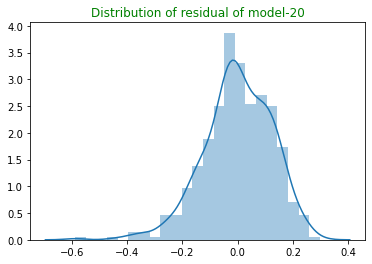

In [97]:
# Calculate y_train_pred
y_train_pred_mn = lm20_model.predict(X_train_mn)
# calculate residual
res = y_train - y_train_pred_mn
# plot residual on distplot
sns.distplot(res)
plt.title('Distribution of residual of model-20', color='g')
plt.show()

#### Model-16

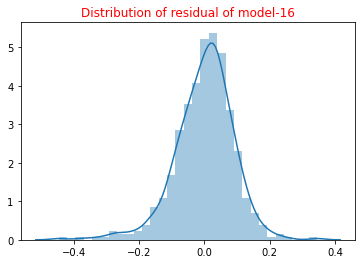

In [98]:
# Calculate y_train_pred
y_train_pred_rfe = lr16_model.predict(X_train_rfesm)
# calculate residual
res_rfe = y_train - y_train_pred_rfe
# plot residual on distplot
sns.distplot(res_rfe)
plt.title('Distribution of residual of model-16', color='r')
plt.show()

#### Model-13

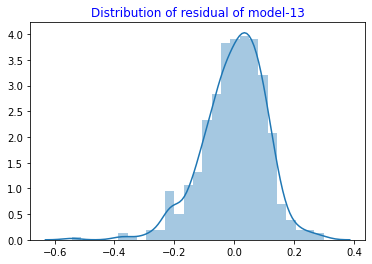

In [99]:
# Calculate y_train_pred
y_train_pred_bac = lr13_model.predict(X_train_sm)
# calculate residual
res_bac = y_train - y_train_pred_bac
# plot residual on distplot
sns.distplot(res_bac)
plt.title('Distribution of residual of model-13', color='b')
plt.show()

- We can see in the residual distribution of all the three models that almost values are distributed around zero.
- Let see any pattern in their residual distribution against dependent variable.

#### Model-20

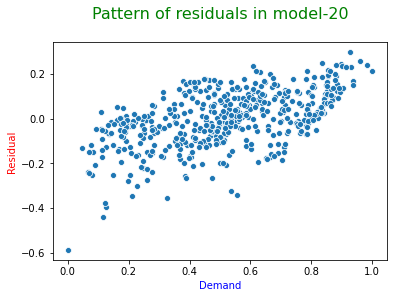

In [100]:
sns.scatterplot(y_train, res)
plt.title('Pattern of residuals in model-20\n', fontsize=16, color='g')
plt.xlabel('Demand', color='b')
plt.ylabel('Residual', color='r')
plt.show()

#### Model-16

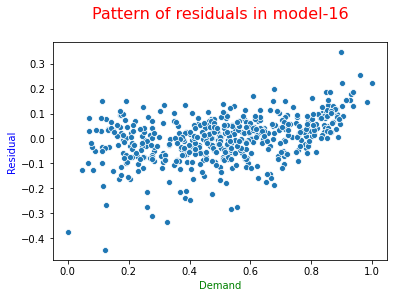

In [101]:
sns.scatterplot(y_train, res_rfe)
plt.title('Pattern of residuals in model-16\n', fontsize=16, color='r')
plt.xlabel('Demand', color='g')
plt.ylabel('Residual', color='b')
plt.show()

#### Model-13

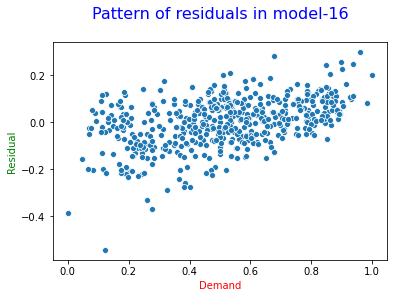

In [102]:
sns.scatterplot(y_train, res_bac)
plt.title('Pattern of residuals in model-16\n', fontsize=16, color='b')
plt.xlabel('Demand', color='r')
plt.ylabel('Residual', color='g')
plt.show()

- There is also not major difference between their pattern of residuals 
- Now they are ready for prediction on the test set 
- After predicing these model on the test set
- On the basis of that we are choosing the model and their indepedent variables which are significant for demand prediction

# Step7: Prediction on Test Set

In [103]:
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thr,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_mist
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


#### Scale the Test Set

In [104]:
 # Instantiate list of numeric column
num_var = ['temp','hum','windspeed','cnt']
# scale the numeric column
bike_test[num_var] = scaler.transform(bike_test[num_var])
bike_test.head()      # for check the result

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thr,weekday_tue,weekday_wed,weathersit_light_snow,weathersit_mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


#### Create X and y 

In [105]:
# Create X and y
y_test = bike_test['cnt']
X_test = bike_test[column(bike_test)]

In [106]:
# for check the result
print(y_test.shape)
print(X_test.shape)

(220,)
(220, 28)


#### Prediction on Test Set based on model-20

In [107]:
# Taking independent varoiables which came in model 20
X_test_mn = X_test[['mnth_sep','weekday_sun','temp','yr']]
# add a constant
X_test_mn = sm.add_constant(X_test_mn)
# Predicting y
y_test_predmn = lm20_model.predict(X_test_mn)

In [108]:
# import useful libraries for evaluating
from sklearn.metrics import r2_score

In [109]:
# Evaluate the model
r2_score(y_true=y_test, y_pred=y_test_predmn)

0.6747548382896573

- As we can see the R-square after evaluating the model-20 get almost same.
- Let see what will be the R-square value based on other model

#### Prediction on Test Set based on model-16

In [110]:
# Taking independent varoiables which came in model-16
X_test_rfe = X_test[X_train_rfes.columns]
# add a constant
X_test_rfe = sm.add_constant(X_test_rfe)
# Predicting y
y_test_predrfe = lr16_model.predict(X_test_rfe)

In [111]:
# Evaluate the model
r2_score(y_true=y_test, y_pred=y_test_predrfe)

0.813676132581787

- After evaluating model-16 in this case also we get almost same R-square value.
- Let see the value of R-square in the last model-13

#### Prediction on Test Set based on model-13

In [112]:
# Taking independent varoiables which came in model-13
X_test_back = X_test[X_train.columns]
# add a constant
X_test_back = sm.add_constant(X_test_back)
# Predicting y
y_test_predback = lr13_model.predict(X_test_back)

In [113]:
# Evaluate the model
r2_score(y_true=y_test, y_pred=y_test_predback)

0.7363228033023915

- After evaluating model-13 we can see that R-square value is somehow same but the difference is more as compared to previous two models evaluation.
- So based on these evaluation first we choose model-16 and model-20
- Now between those two models R-square value we choose the independent variables of model-16.
- And among those variables our derived independent variables based on model-20
- Which are september, sunday, temperature and year

#### Now let see how these variables describe the demand of bike 

In [114]:
# create parameters for describing variables
lm_mn = sm.OLS(y_test,X_test_mn).fit()
lm_mn.params

const          0.059876
mnth_sep       0.051996
weekday_sun    0.052870
temp           0.587896
yr             0.251439
dtype: float64

#### Based on these parameters we can describe that:
- If we increase one unit of temp variable and keep other variable constant then there is 0.587896 unit of increase in demand of bike.
- If we increase one unit of yr variable and keeping other variable constant then there is 0.251439 unit of increase in demand of bike.
- If we increase one unit of sun variable and keeping other variable constant then there is 0.052870 unit of increase in demand of bike.
- If we increase one unit of sep variable and keeping other variable constant then there is 0.051996 unit of increase in demand of bike.
- And if there is no increase in our independent variable then there is 0.059876 unit of increase in demand of bike